In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from scipy.stats.stats import kendalltau
import scipy.stats

## **Data Preparation**

In [ ]:
#Generate the dataset
data=pd.read_excel('data.xlsx')
data.head()

,location,population,total_cases,total_deaths,total_tests,gdp_per_capita,human_development_index,evolution_of_gdp,lockdown_type,health_expenditure_covid,evolution_of_public_debt,%tourism_gdp,%health_expenditures_GDP,unemployment_rate_2019,%cases,%deaths,%tests
0,Afghanistan,38928346.0,51526,2191.0,200385.0,1803.987,0.498,-5.0,Full,35978.379505,1.718,NaN,12.0,10.98,0.132361,0.005628,0.514753
1,Albania,2877797.0,58316,1181.0,247526.0,11803.431,0.785,-7.5,Full,2631.314062,15.540,27.0,7.0,11.47,2.026411,0.041038,8.601232
2,Algeria,43851044.0,99610,2756.0,NaN,13913.839,0.754,-5.5,Full,38672.444118,10.940,6.7,6.0,11.81,0.227155,0.006285,0.000000
3,Andorra,77265.0,8049,84.0,180088.0,NaN,0.858,-4.0,Full,90.668600,NaN,NaN,10.0,NaN,10.417395,0.108717,233.078367
4,Angola,32866272.0,17553,405.0,174111.0,5819.495,0.581,-17.3,Full,31108.077679,11.080,3.7,3.0,6.92,0.053407,0.001232,0.529756


In [ ]:
#Shape of the data
data.shape

(191, 17)

In [ ]:
#Types of the data
data.dtypes

location                     object
population                  float64
total_cases                   int64
total_deaths                float64
total_tests                 float64
gdp_per_capita              float64
human_development_index     float64
evolution_of_gdp            float64
lockdown_type                object
health_expenditure_covid    float64
evolution_of_public_debt    float64
%tourism_gdp                float64
%health_expenditures_GDP    float64
unemployment_rate_2019      float64
%cases                      float64
%deaths                     float64
%tests                      float64
dtype: object

In [ ]:
#Description of the data
data.describe()

,population,total_cases,total_deaths,total_tests,gdp_per_capita,human_development_index,evolution_of_gdp,health_expenditure_covid,evolution_of_public_debt,%tourism_gdp,%health_expenditures_GDP,unemployment_rate_2019,%cases,%deaths,%tests
count,1.870000e+02,1.910000e+02,181.000000,1.700000e+02,182.000000,184.000000,186.000000,1.850000e+02,177.000000,167.000000,167.000000,174.000000,188.000000,188.000000,188.000000
mean,4.137514e+07,4.374899e+05,10054.596685,7.125784e+06,18532.816115,0.709739,-6.155914,5.002444e+04,10.712774,13.095808,6.449102,6.705977,1.570993,0.028698,23.656828
std,1.504557e+08,1.762801e+06,34436.011630,2.754494e+07,19615.150527,0.154440,7.898429,1.672100e+05,9.454459,11.480719,2.542787,5.011862,1.977073,0.039060,39.768921
min,3.393100e+04,1.000000e+00,0.000000,1.490000e+02,661.240000,0.354000,-66.700000,4.463609e+01,-8.448000,1.600000,1.000000,0.110000,0.000000,0.000000,0.000000
25%,2.384148e+06,5.792500e+03,104.000000,1.359120e+05,3924.303000,0.588750,-8.175000,2.241585e+03,5.040000,6.450000,5.000000,3.430000,0.092791,0.001056,1.560820
50%,9.537645e+06,4.329900e+04,669.000000,7.366230e+05,11822.138500,0.738500,-5.250000,1.119109e+04,9.346000,9.300000,6.000000,5.110000,0.609873,0.007900,9.083980
75%,3.044945e+07,2.017310e+05,4022.000000,3.384875e+06,26678.742500,0.826500,-2.725000,3.528675e+04,13.938000,14.650000,8.000000,8.887500,2.628885,0.042045,29.673191
max,1.439324e+09,2.006105e+07,345955.000000,2.519264e+08,116935.600000,0.953000,26.200000,1.417593e+06,62.973000,66.100000,17.000000,28.460000,10.417395,0.173882,268.734684


In [ ]:
#Missed values
data.isnull().sum()

location                     0
population                   4
total_cases                  0
total_deaths                10
total_tests                 21
gdp_per_capita               9
human_development_index      7
evolution_of_gdp             5
lockdown_type               11
health_expenditure_covid     6
evolution_of_public_debt    14
%tourism_gdp                24
%health_expenditures_GDP    24
unemployment_rate_2019      17
%cases                       3
%deaths                      3
%tests                       3
dtype: int64

In [ ]:
#Drop unneeded columns, as we have the percentage of cases, deaths and tests campared to the population 
data = data.drop(['population', 'total_cases', 'total_deaths', 'total_tests'], axis=1)

In [ ]:
#Drop missing values
data = data.dropna()

In [ ]:
#Shape of the data after droping missing values and unneeded columns
data.shape

(139, 13)

In [ ]:
#Show the dataframe
data.head()

,location,gdp_per_capita,human_development_index,evolution_of_gdp,lockdown_type,health_expenditure_covid,evolution_of_public_debt,%tourism_gdp,%health_expenditures_GDP,unemployment_rate_2019,%cases,%deaths,%tests
1,Albania,11803.431,0.785,-7.5,Full,2631.314062,15.540,27.0,7.0,11.47,2.026411,0.041038,8.601232
2,Algeria,13913.839,0.754,-5.5,Full,38672.444118,10.940,6.7,6.0,11.81,0.227155,0.006285,0.000000
4,Angola,5819.495,0.581,-17.3,Full,31108.077679,11.080,3.7,3.0,6.92,0.053407,0.001232,0.529756
6,Argentina,18933.907,0.825,-4.5,Full,46101.112222,6.311,9.8,9.0,9.84,3.596606,0.095684,9.385406
7,Armenia,8787.580,0.755,-19.7,Full,2773.193927,10.765,14.1,10.0,18.80,5.379545,0.095267,20.042332


## **Data Visualization**

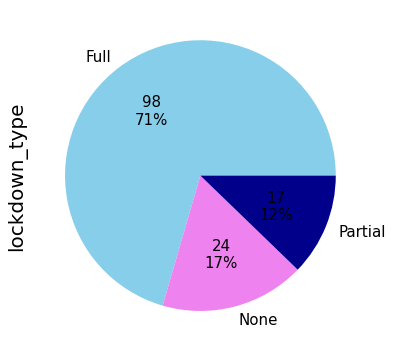

In [ ]:
#Visualize lockdown type (categorical variable)
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

data.groupby('lockdown_type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                  colors=['skyblue', 'violet', 'darkblue'], ax=ax1)
ax1.set_ylabel('lockdown_type', size=20)
plt.tight_layout()
plt.show()

The majority of countries were on a full lockdown in 2020

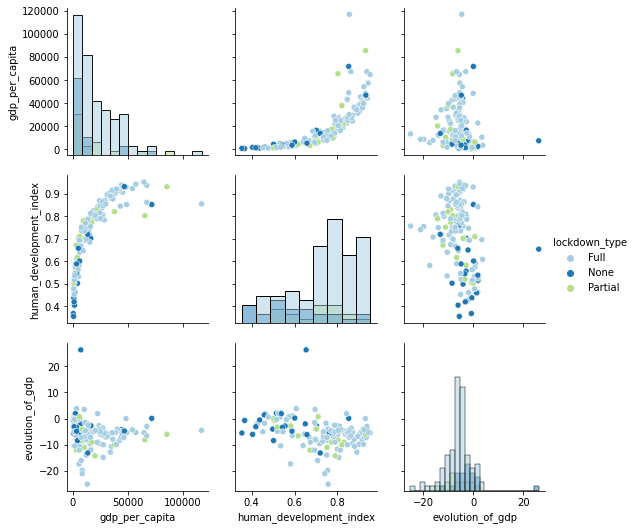

In [ ]:
#Pairplots of the data
g = sns.PairGrid(data, vars=["gdp_per_capita",	"human_development_index",	"evolution_of_gdp"], hue="lockdown_type")
sns.set_palette("Paired")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

We can notice a clear correlation between the human dev index and the gdp per capita which is evident as this latter is included in the calculation of the HDI

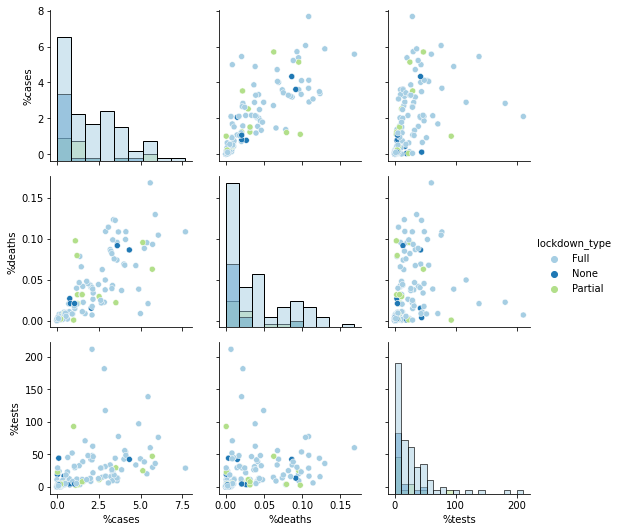

In [ ]:
#Pairplots of the data
g = sns.PairGrid(data, vars=["%cases",	"%deaths",	"%tests"], hue="lockdown_type")
sns.set_palette("Paired")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

A linear correlation between the percentage of cases and the percentage of deaths and tests can be seen on the graph above, we can also notice multiple outliers 

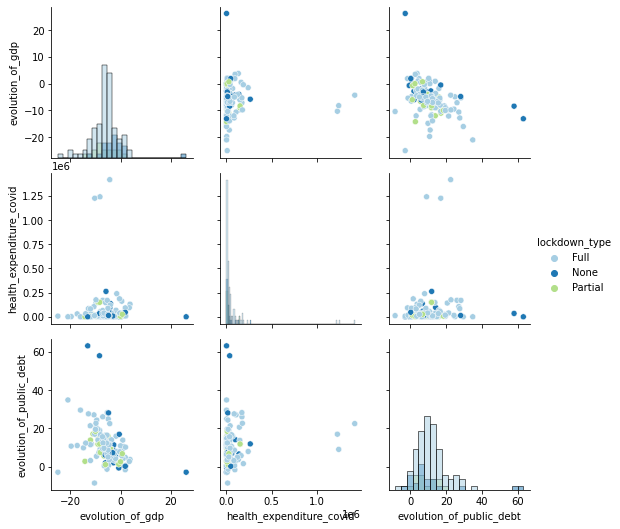

In [ ]:
#Pairplots of the data
g = sns.PairGrid(data, vars=["evolution_of_gdp",	"health_expenditure_covid",	"evolution_of_public_debt"], hue="lockdown_type")
sns.set_palette("Paired")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

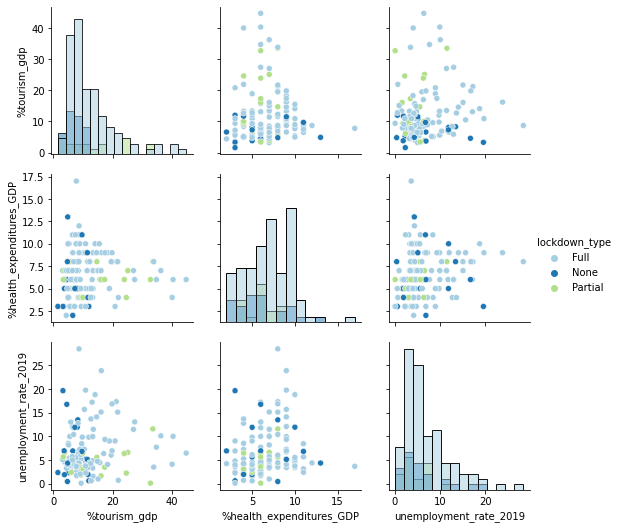

In [ ]:
#Pairplots of the data
g = sns.PairGrid(data, vars=["%tourism_gdp",	"%health_expenditures_GDP",	"unemployment_rate_2019"], hue="lockdown_type")
sns.set_palette("Paired")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Let's now check the correlation between our variables

## **Correlation**

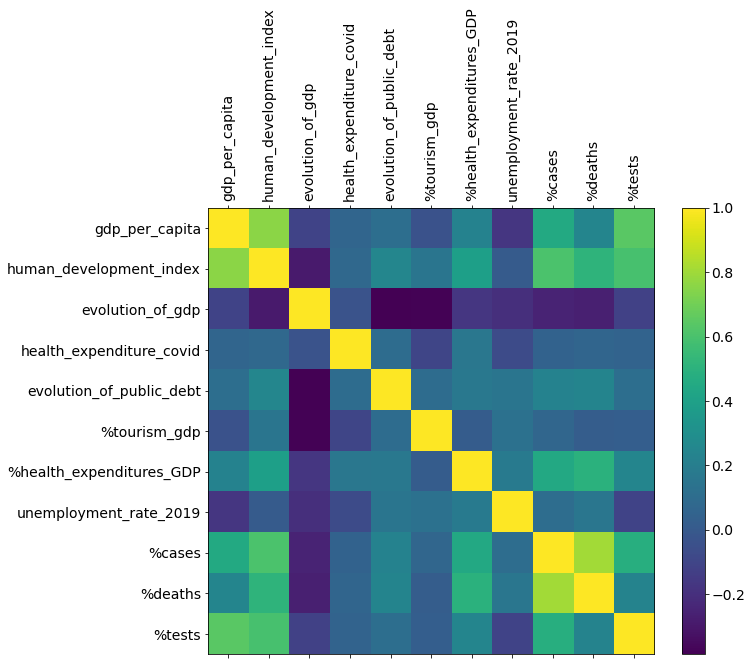

In [ ]:
#Correlation matrix
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('', fontsize=16);

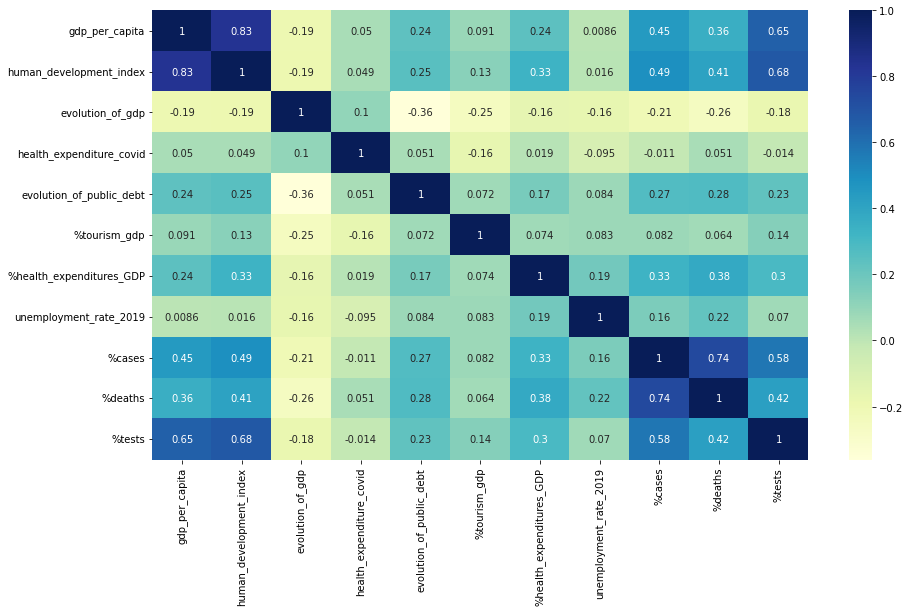

In [ ]:
#Kendall correlation
corr = data.corr(method='kendall')
rcParams['figure.figsize'] = 14.7,8.27
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

We note that the gdp per capita is strongly correlated to the HDI (0.83), which is normal since the HDI measures the average level at which a country is located according to three essential criteria of human development: longevity, education and conditions of life. Then comes the % of deaths and cases (0.74), the HDI and the % of tests (0.68) maybe because the more a country is developed the more it invests on tests and finally the % of cases and the % of tests (0.58) 

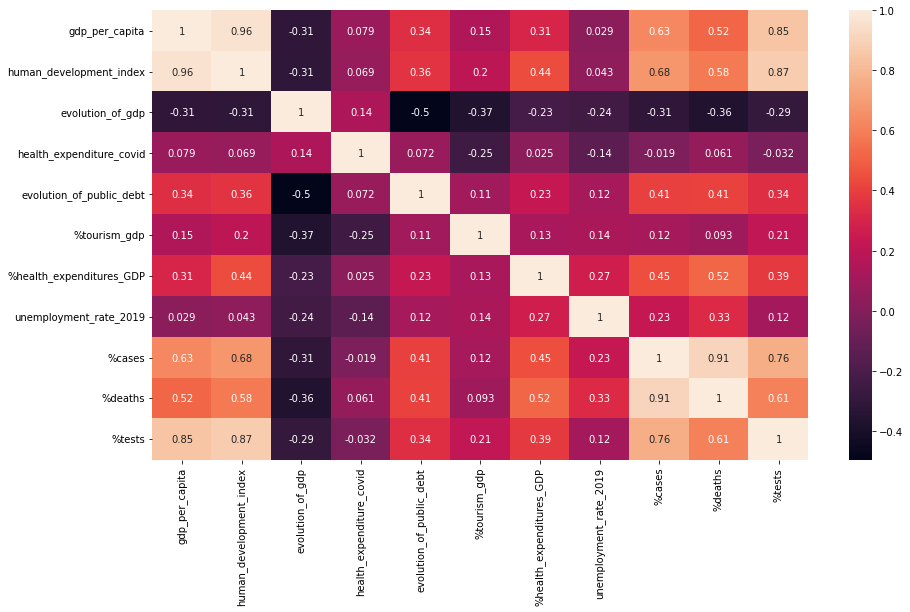

In [ ]:
#Spearman correlation
corr1 = data.corr(method = 'spearman')
sns.heatmap(corr1, annot = True)
plt.show()

We have 2 economic factors that we can focus on: evolution of gdp and evolution of public debt. As the the evolution of the gdp impacts the evolution of the public debt (a low gdp leads to debt), we can focus on this latter as our dependent variable

In [ ]:
#Drop correlated variables
data = data.drop(['gdp_per_capita', '%cases'], axis=1)

In [ ]:
#Encode lockdown variable
data["lockdown_type"] = "lockdown_type-" + data["lockdown_type"]
data_1 = pd.get_dummies(data["lockdown_type"])
data = pd.concat([data, data_1], axis=1)

In [ ]:
#Drop lockdown type
data = data.drop(['lockdown_type'], axis=1)

## **Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


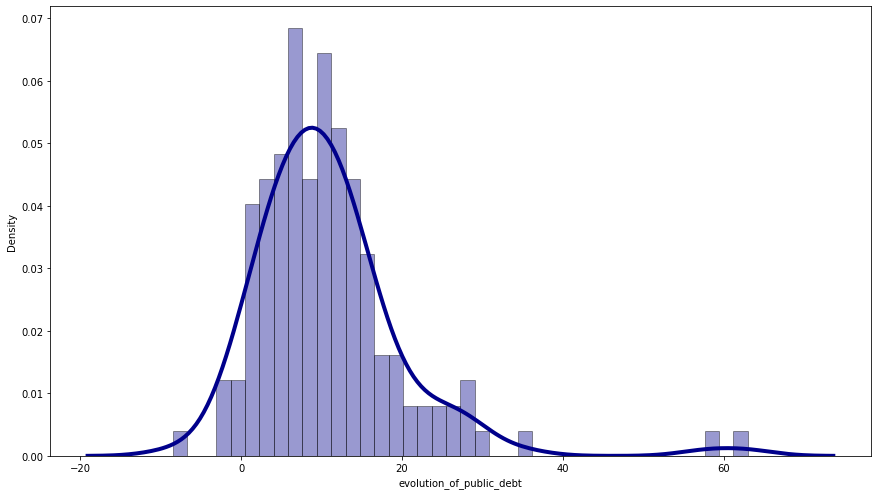

In [ ]:
#Histogram
sns.distplot(data['evolution_of_public_debt'], hist=True, kde=True, 
             bins=40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

We notice that our dependent variable looks like a normal or a student distribution, but we will verify these assumptions with normality tests

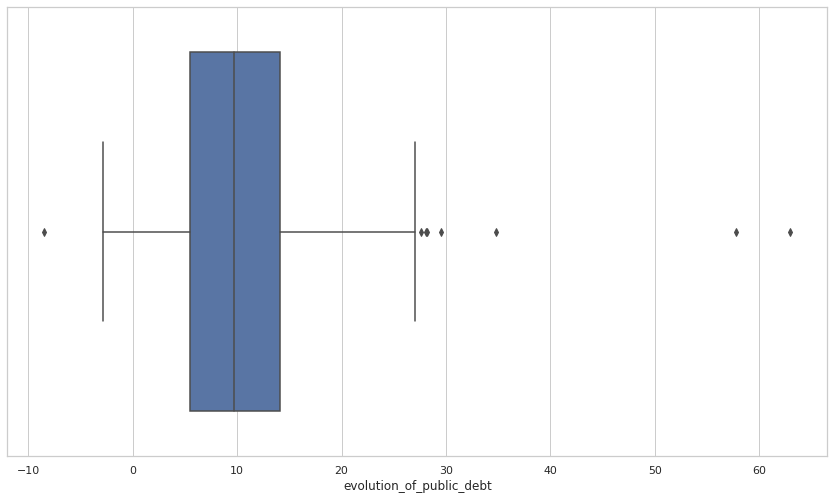

In [ ]:
#Box plot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["evolution_of_public_debt"])
figsize=(20,10)

We can see the presence of some outliers

In [ ]:
#Outliers in the dependent variable based on the z-score
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score = (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_datapoints = detect_outlier(data['evolution_of_public_debt'])
print(outlier_datapoints)

[57.80699999999999, 62.973]


In [ ]:
#Z-scores
from scipy import stats
z = np.abs(stats.zscore(data.drop(['location'], axis=1)))
print(z)

[[4.08723655e-01 3.65760918e-01 3.22233186e-01 ... 6.46813224e-01
  4.56832193e-01 3.73288444e-01]
 [2.05211957e-01 6.59028680e-04 1.32719733e-01 ... 6.46813224e-01
  4.56832193e-01 3.73288444e-01]
 [9.30514611e-01 2.16121865e+00 1.72495101e-01 ... 6.46813224e-01
  4.56832193e-01 3.73288444e-01]
 ...
 [1.77738587e+00 9.22640153e-02 2.01043983e-01 ... 6.46813224e-01
  4.56832193e-01 3.73288444e-01]
 [8.84560357e-01 1.28906010e-01 2.61948320e-01 ... 1.54604137e+00
  2.18898759e+00 3.73288444e-01]
 [1.23249971e+00 8.97069840e-01 2.69461373e-01 ... 6.46813224e-01
  4.56832193e-01 3.73288444e-01]]


In [ ]:
#Resetting index
data.reset_index(inplace = True)

In [ ]:
#Drop index
data = data.drop(['index'], axis=1)

In [ ]:
#index where z-score is higher than 3
print(np.where(z > 3))

(array([  8,   9,  13,  14,  29,  33,  40,  51,  56,  72,  73, 115, 118,
       119, 130, 132, 132]), array([4, 8, 7, 4, 2, 8, 4, 1, 2, 1, 6, 6, 3, 3, 8, 2, 5]))


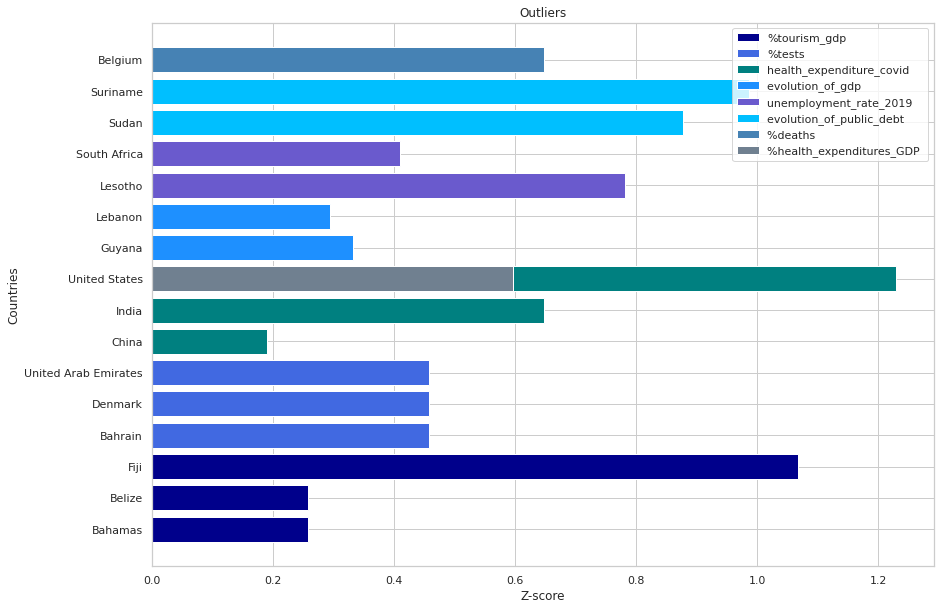

In [ ]:
# Plot Z-scores of the outliers and their corresponding countries
plt.figure(figsize=[14, 10])
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(['Bahamas', 'Belize', 'Fiji'], [z[8][5], z[14][5], z[40][5]], label = "%tourism_gdp", color = 'darkblue')
plt.barh(['Bahrain', 'Denmark', 'United Arab Emirates'], [z[9][10], z[33][10], z[130][10]] , label = "%tests", color = 'royalblue')
plt.barh(['China', 'India', 'United States'], [z[29][3], z[56][3], z[132][3]], label = "health_expenditure_covid ", color = 'teal')
plt.barh(['Guyana', 'Lebanon'], [z[51][2], z[72][2]] , label = "evolution_of_gdp ", color = 'dodgerblue')
plt.barh(['Lesotho', 'South Africa'], [z[73][7], z[115][7]] , label = "unemployment_rate_2019 ", color = 'slateblue')
plt.barh(['Sudan', 'Suriname'], [z[118][4], z[119][4]] , label = "evolution_of_public_debt ", color = 'deepskyblue')
plt.barh(['Belgium'], [z[13][9]] , label = "%deaths ", color = 'steelblue')
plt.barh(['United States'], [z[132][6]] , label = "%health_expenditures_GDP ", color = 'slategray')

# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('Z-score')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('Outliers')
# Displaying the bar plot
plt.show()

Some outliers have been deleted and others have been kept due to multiple reasons that were detailed in the report [here](https://drive.google.com/file/d/1w0c4zZu4Szdl-QQ_NBZMWq5WgRhMo029/view?usp=sharing)

In [ ]:
#Drop unnatural outliers
data = data.drop(index=51, axis=0)
data = data.drop(index=72, axis=0)
data = data.drop(index=118, axis=0)
data = data.drop(index=119, axis=0)

In [ ]:
#Get the mean and the variance of our dependent variable
mean, var  = scipy.stats.distributions.norm.fit(data['evolution_of_public_debt'])
mean, var

(10.328400000000002, 7.259553590193332)

In [ ]:
#Get student parameters
from scipy.stats import t
t.fit(data["evolution_of_public_debt"])

(6.34145920732675, 9.761367215044988, 6.081952797628302)

In [ ]:
max(data['evolution_of_public_debt'])

34.793

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


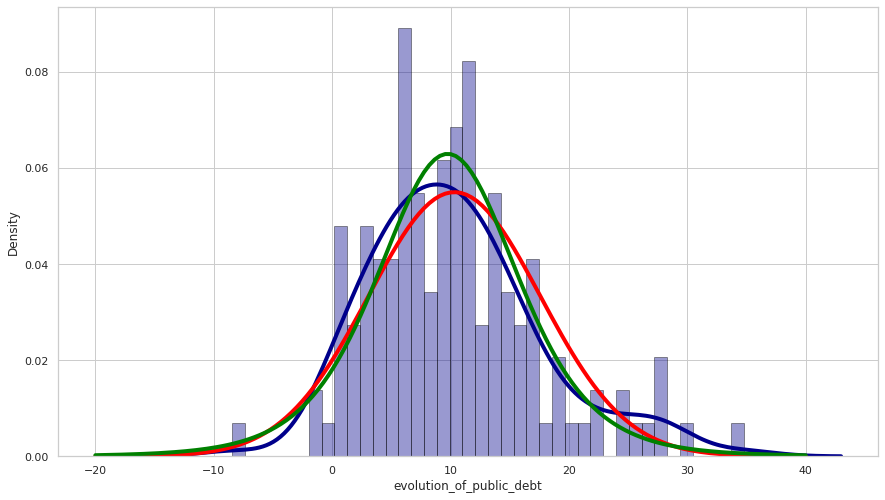

In [ ]:
#Histogram  with student and normal distributions
sns.distplot(data['evolution_of_public_debt'], hist=True, kde=True, 
             bins=40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#Normal dist
x_min = -20
x_max = 40
mean = 10.328400000000002
std = 7.259553590193332
x = np.linspace(x_min, x_max, 135)
y = scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y, color='red', linewidth=4)

#Student dist
df=6
mean_t = 9.761367215044988
std_t = 6.081952797628302
y1 = scipy.stats.t.pdf(x,df,mean_t,std_t)
plt.plot(x,y1, color='green', linewidth=4)
plt.show()

The blue curve is more close to the green one than the red one, so we can say at this point that our variable is a student distribution

## **QQ-Plots**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


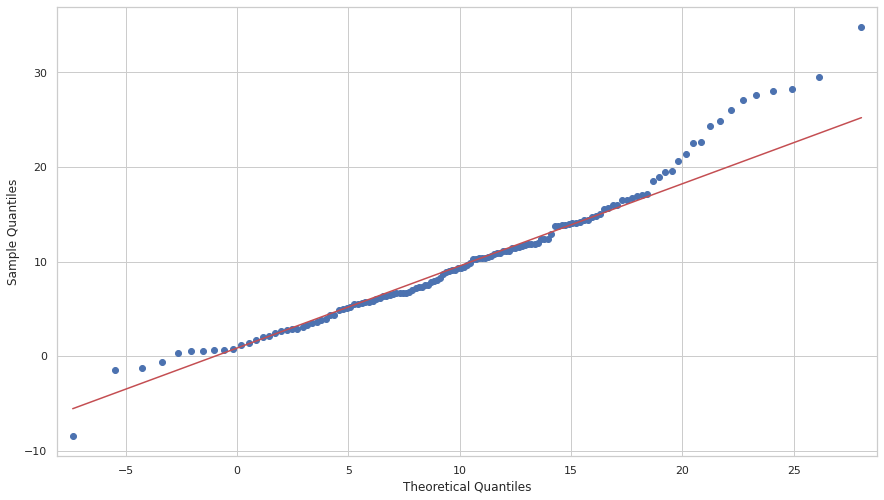

In [ ]:
#QQ-Plot normal distribution
import statsmodels.api as sm
fig = sm.qqplot(data['evolution_of_public_debt'], dist='norm', line="q", loc=10.328400000000002, scale=7.259553590193332)
plt.show()

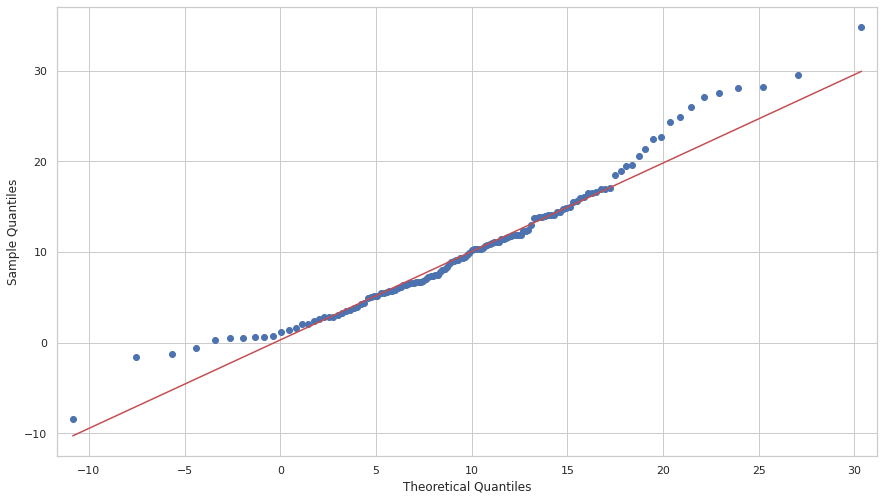

In [ ]:
#QQ-Plot student distribution
import statsmodels.api as sm
fig = sm.qqplot(data['evolution_of_public_debt'], stats.t, distargs=(6,), line="q", loc=9.761367215044988 , scale=6.081952797628302)
plt.show()

## **Normality Tests**

In [ ]:
#D'Agostino
ag = stats.normaltest(data['evolution_of_public_debt'])
print(ag)

NormaltestResult(statistic=14.27940482980855, pvalue=0.0007929880427802937)


In [ ]:
#Shapiro-Wilks
sp = stats.shapiro(data['evolution_of_public_debt'])
print(sp)

(0.9620166420936584, 0.0008236978319473565)


In [ ]:
#Anderson-Darling
import statsmodels.stats.diagnostic as stat
print(stat.normal_ad(data['evolution_of_public_debt']))

(1.4108110818547175, 0.0011489369508115095)


In [ ]:
#Kolmogorov-Smirnov for normal distribution
print(stats.kstest(data['evolution_of_public_debt'], 'norm'))

KstestResult(statistic=0.883908637003509, pvalue=1.2948585120680185e-126)


The p-values found are much lower than 0.05, so we reject the normality hypothesis

In [ ]:
#Kolmogorov-Smirnov for student distribution
print(stats.kstest(data['evolution_of_public_debt'], 't', args = (6, )))

KstestResult(statistic=0.862601946602892, pvalue=1.3621194913267486e-116)


The p-value related to the student distribution is higher than the one related to the normal distribution, so again we can confirm the student hypothesis

## **Stats Model**

In [ ]:
#Stats model
model = sm.OLS(data['evolution_of_public_debt'].values, sm.add_constant(data.drop(['location', 'evolution_of_public_debt'], axis=1).values)).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     6.284
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           9.58e-08
Time:                        19:26:45   Log-Likelihood:                -431.50
No. Observations:                 135   AIC:                             885.0
Df Residuals:                     124   BIC:                             916.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4855      2.546     -0.583      0.5

We have two variables with a low p-value: human_development_index and evolution_of_gdp, the R-squared is relatively low, as we don't have much data, and our model explains 28% of our data as the adjusted R-squared shows 

In [ ]:
#Fitted values
predictions = model.predict(sm.add_constant(data.drop(['location', 'evolution_of_public_debt'], axis=1).values))

In [ ]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(data['evolution_of_public_debt'], predictions)

34.975356628006935

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residual plot')

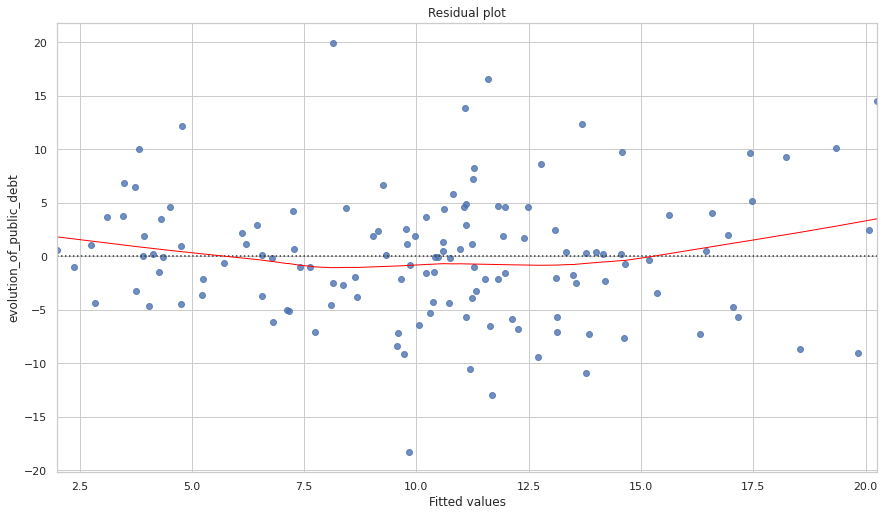

In [ ]:
#Residual plot
sns.residplot(predictions.reshape(-1),'evolution_of_public_debt', data=data, lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

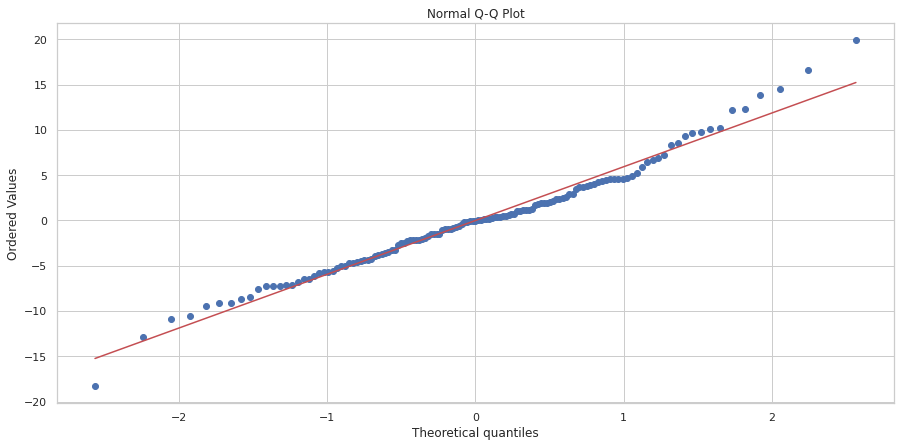

In [ ]:
#Normal QQ plot
residuals = data["evolution_of_public_debt"] - predictions.reshape(-1)
plt.figure(figsize=(15,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Fitted value')

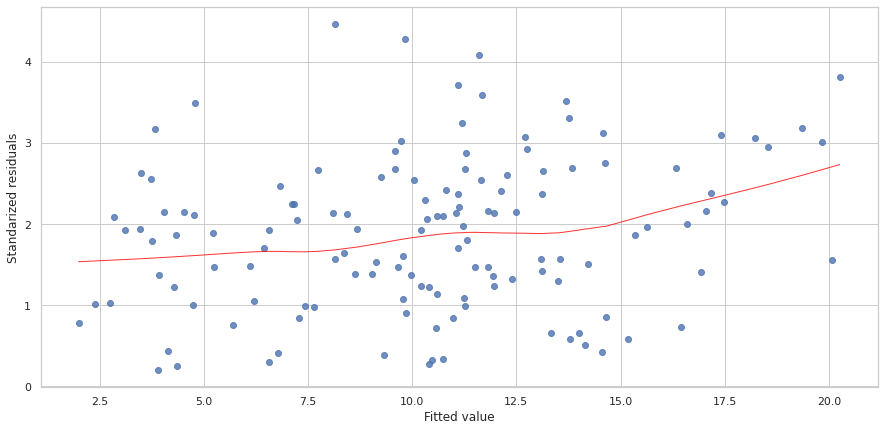

In [ ]:
#Standarized vs fitted residuals
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(15,7))
sns.regplot(predictions.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


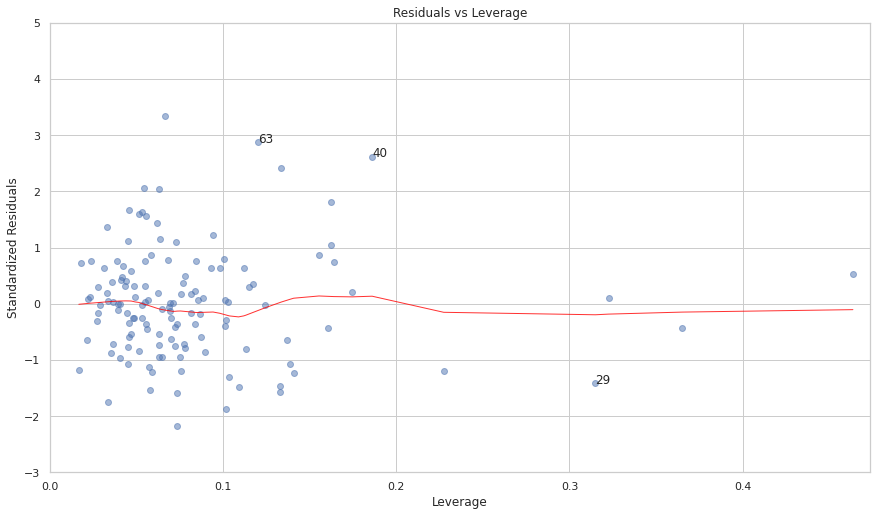

In [ ]:
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

We can improve our model by selecting the best variables

## **Stepwise Selection**

In [ ]:
#Forward Selection
X = data.drop(['location', 'evolution_of_public_debt'], axis=1)
y = data['evolution_of_public_debt']

def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = excluded[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

forward_regression(X, y)

Add  evolution_of_gdp               with p-value 5.78145e-09
Add  human_development_index        with p-value 0.000578527


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


['evolution_of_gdp', 'human_development_index']

In [ ]:
#Backward Selection
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X, y)

Drop %tests                         with p-value 0.887504
Drop %health_expenditures_GDP       with p-value 0.791685
Drop lockdown_type-Full             with p-value 0.810231
Drop unemployment_rate_2019         with p-value 0.749775
Drop lockdown_type-None             with p-value 0.419747
Drop %tourism_gdp                   with p-value 0.290243
Drop lockdown_type-Partial          with p-value 0.242278
Drop %deaths                        with p-value 0.128622
Drop health_expenditure_covid       with p-value 0.105074


['human_development_index', 'evolution_of_gdp']

In [ ]:
import statsmodels.api as sm
#Stepwise Selection
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = excluded[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        print(included)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)
print('resulting features:')
print(result)

Add  evolution_of_gdp               with p-value 5.78145e-09
['evolution_of_gdp']
Add  human_development_index        with p-value 0.000578527
['evolution_of_gdp', 'human_development_index']
['evolution_of_gdp', 'human_development_index']
resulting features:
['evolution_of_gdp', 'human_development_index']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


The three methods give the same results: 2 variables to include, ['evolution_of_gdp', 'human_development_index']

In [ ]:
#Stats model
model_2 = sm.OLS(data['evolution_of_public_debt'].values, sm.add_constant(data[['evolution_of_gdp', 'human_development_index']].values)).fit()
print_model_2 = model_2.summary()
print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     27.28
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.21e-10
Time:                        19:25:45   Log-Likelihood:                -435.82
No. Observations:                 135   AIC:                             877.6
Df Residuals:                     132   BIC:                             886.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5215      2.577     -0.978      0.3

In [ ]:
#Fitted values
predictions_2 = model_2.predict(sm.add_constant(data[['evolution_of_gdp', 'human_development_index']].values))

In [ ]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(data['evolution_of_public_debt'], predictions_2)

37.288848176360574

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residual plot')

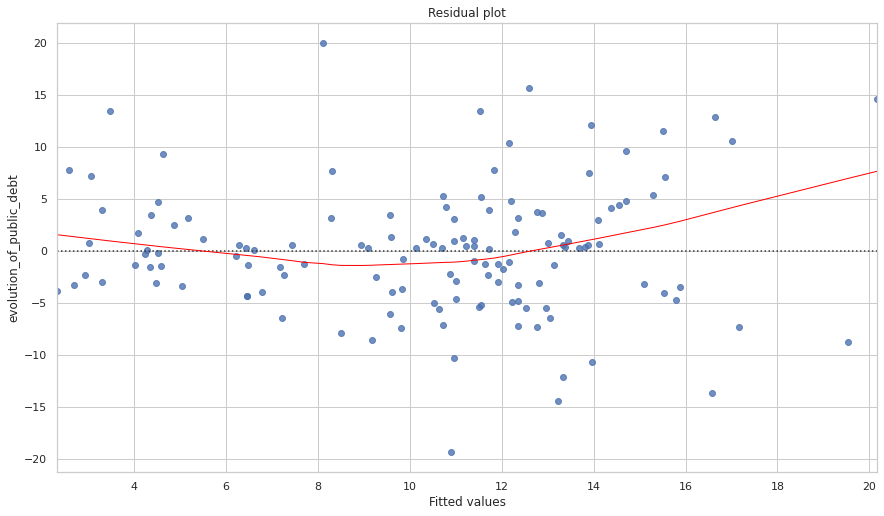

In [ ]:
#Residual plot
sns.residplot(predictions_2.reshape(-1),'evolution_of_public_debt', data=data, lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

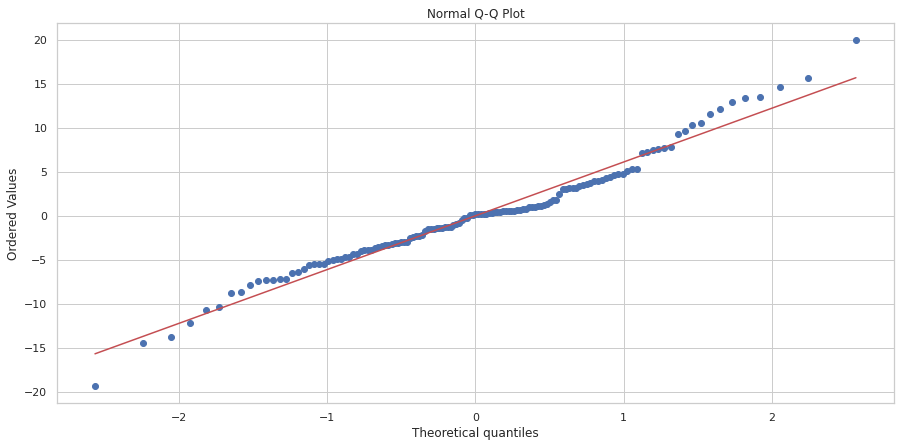

In [ ]:
#Normal QQ plot
residuals_2 = data["evolution_of_public_debt"] - predictions_2.reshape(-1)
plt.figure(figsize=(15,7))
stats.probplot(residuals_2, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Fitted value')

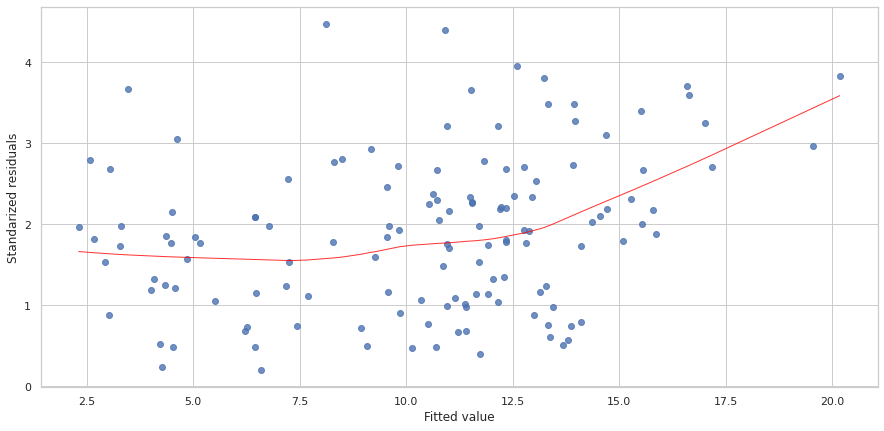

In [ ]:
#Standarized vs fitted residuals
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals_2))

plt.figure(figsize=(15,7))
sns.regplot(predictions_2.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


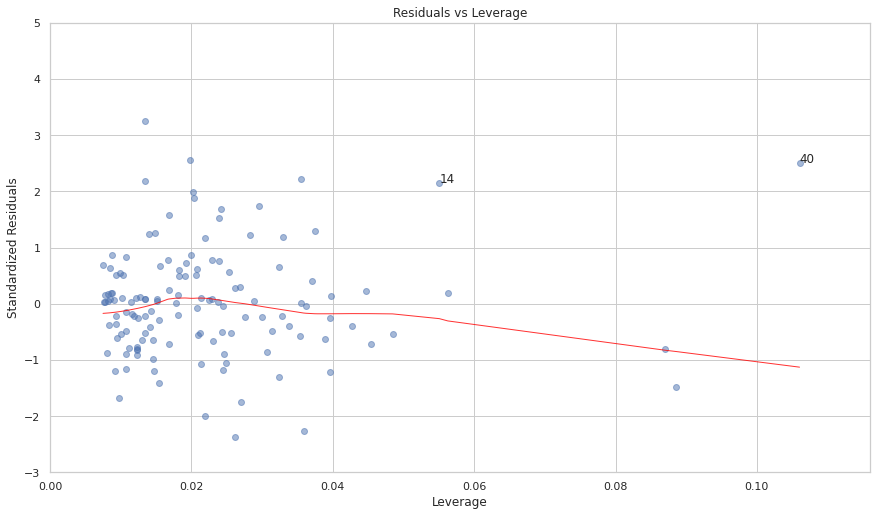

In [ ]:
# model residuals
model_residuals_2 = model_2.resid
# normalized residuals
model_norm_residuals_2 = model_2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt_2 = np.sqrt(np.abs(model_norm_residuals_2))
# absolute residuals
model_abs_resid_2 = np.abs(model_residuals_2)
# leverage, from statsmodels internals
model_leverage_2 = model_2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks_2 = model_2.get_influence().cooks_distance[0]
plot_lm_4 = plt.figure();
plt.scatter(model_leverage_2, model_norm_residuals_2, alpha=0.5)
sns.regplot(model_leverage_2, model_norm_residuals_2,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage_2)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks_2), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage_2[i],
                                     model_norm_residuals_2[i]));

All the explanations are available in the report [here](https://drive.google.com/file/d/1w0c4zZu4Szdl-QQ_NBZMWq5WgRhMo029/view?usp=sharing)

## **Machine Learning Models**